# Heart Disease Prediction
Author:[Dr.Madeeha Tassadaq](https://www.linkedin.com/in/dr-madeeha-tassadaq-3104aa290/)\
Date:01.May,2024\
[Dataset]:(https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)\
[Github]:(https://github.com/MadeehaTassadaq/python_basics)\
[Linkedin]:(https://www.linkedin.com/in/dr-madeeha-tassadaq-3104aa290/))

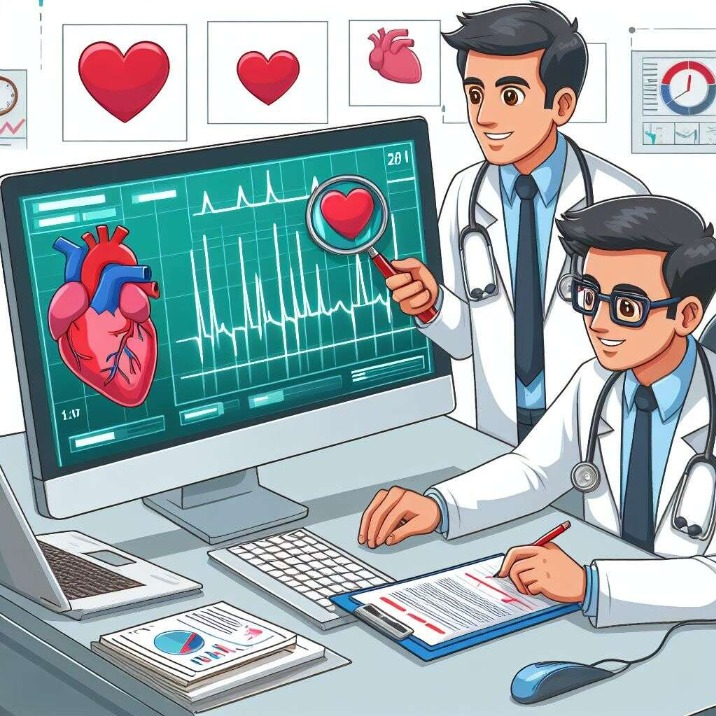

`About Dataset`
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:
1. `id` Unique id for each patient
2. `age` Age of the patient in years
3. `origin` place of study
4. `sex` Male/Female
5. `cp` chest pain type 
   * typical angina 
   * atypical angina 
   * non-anginal 
   * asymptomatic
6. `trestbps` resting blood pressure 
7. `cho` serum cholesterol in mg/dl
8. `fbs` if fasting blood sugar > 120 mg/dl
9. `restecg` resting electrocardiographic results
   * Normal 
   * ST abnormality
   * LV hypertrophy
10. `thalach`: maximum heart rate achieved during exercise stress test
11. `exang`: exercise-induced angina (True/ False)
12. `oldpeak`: ST depression induced by exercise relative to rest
13. `slope`: the slope of the peak exercise ST segment
14. `ca`: number of major vessels (0-3) colored by fluoroscopy
15. `thal`: 
    * normal 
    * fixed defect
    * reversible defect
16. `num`: the predicted attribute
### Acknowledgements
#### Creator
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives
`Advancing Cardiovascular Health through Data Science:` 
Being a Medical health professional My main aim is to Investigate Patterns and Predictors of Heart Disease for Enhanced Diagnosis and Treatment Strategies.


In [2]:
# import libraries
# to handle the data
import pandas as pd
import numpy as np
# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
# to preprocess the data 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,r2_score,mean_squared_error
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load file
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
## Lets deep dive into the world of Exploratory Data Analysis (EDA) by exploring the dataset
# explore each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# checking the data shape
df.shape

(920, 16)

In [6]:
df['id'].min(),df['id'].max()

(1, 920)

In [7]:
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

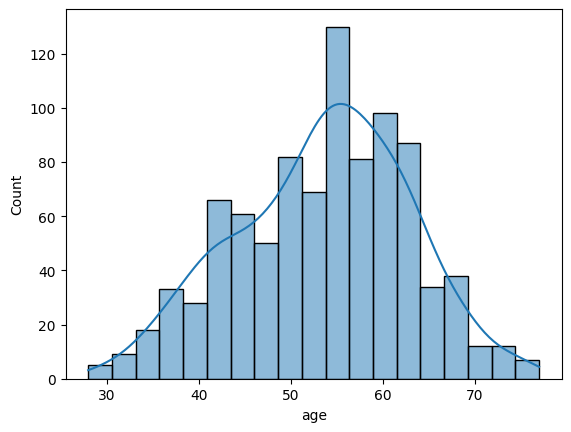

In [8]:
# draw a histograam to see age distribution
sns.histplot(data=df,x='age',kde=True)

In [9]:
Mode_age=df['age'].mode()[0]
Mean_age=df['age'].mean()
Median_age=df['age'].median()
# print the mean,median,mode round off 2 decimal places
print(f'Mean age:{Mean_age}' )
print(f'Median age:{Median_age} ')
print(f'Mode age:{Mode_age} ')


Mean age:53.51086956521739
Median age:54.0 
Mode age:54 


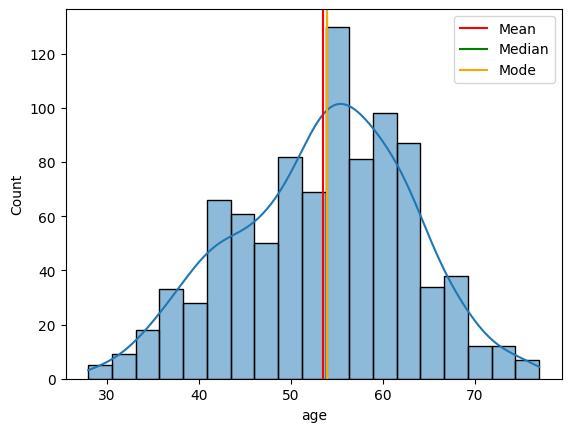

In [10]:
# plot the distribution of age with mean,median,mode
sns.histplot(data=df,x='age',kde=True)
plt.axvline(x=Mean_age,color='red',label='Mean')
plt.axvline(x=Median_age,color='green',label='Median')
plt.axvline(x=Mode_age,color='orange',label='Mode')
plt.legend()

<Axes: xlabel='age', ylabel='Count'>

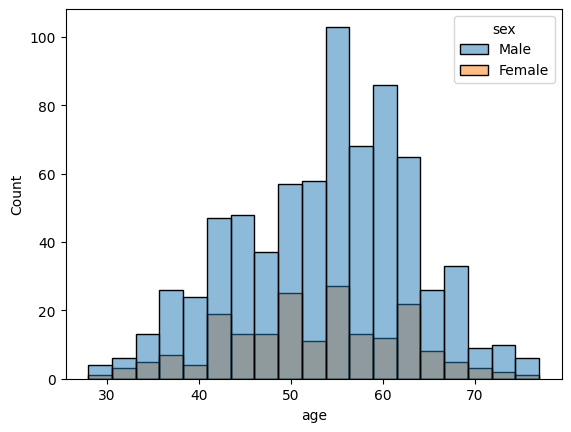

In [11]:
# lets find the relationship of age with sex
sns.histplot(data=df,x='age',hue='sex')

<Axes: xlabel='age', ylabel='Count'>

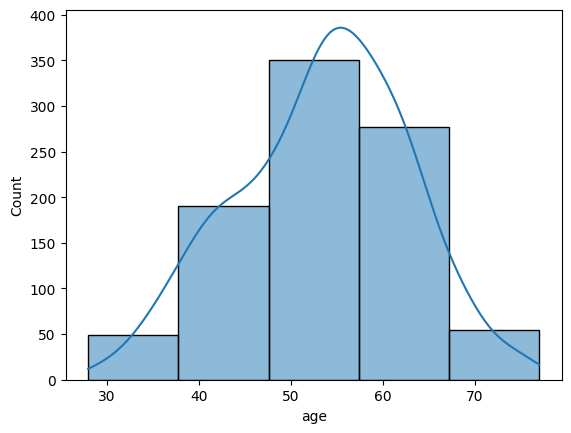

In [12]:
# we can do discretization of age column
bins=['20-30','30-40','40-60','60-70','70-80']
labels=['young_adults','adults','middle_age','old_age','very_old']
sns.histplot(data=df,x='age',kde=True,bins=5)

In [13]:
# lets find the relationship of dataset with sex
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [14]:
# lets  the count of male and female by dataset
df.groupby('dataset')['sex'].value_counts()


dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

In [15]:
# find the relatiionship of age by sex
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [16]:
# lets find out the average age of male and female
df.groupby('sex')['age'].value_counts() 


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [17]:
# count of male and female
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [18]:
# lets find the percentage of male and female round of 2
round(df['sex'].value_counts(normalize=True)*100,2)


sex
Male      78.91
Female    21.09
Name: proportion, dtype: float64

In [19]:
# lets find out average age of male and female
df.loc[df['sex']=='Male', 'age'].mean()
df.loc[df['sex']=='Female', 'age'].mean()


52.47422680412371

In [20]:
# Lets explore the cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [21]:
# find the percentage of those people with typical chest pain are more likely to have heart disease
print(df.loc[df['cp']=='typical angina'].nunique())


id          46
age         31
sex          2
dataset      4
cp           1
trestbps    19
chol        39
fbs          2
restecg      3
thalch      29
exang        2
oldpeak     21
slope        3
ca           3
thal         3
num          5
dtype: int64


<Axes: xlabel='cp', ylabel='count'>

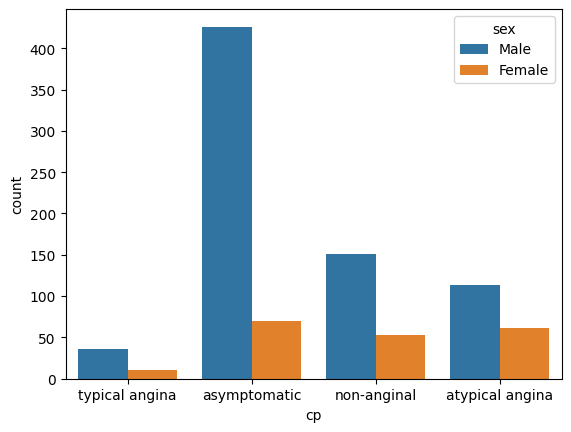

In [22]:
# countplot of chest pain with cp
sns.countplot(data=df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

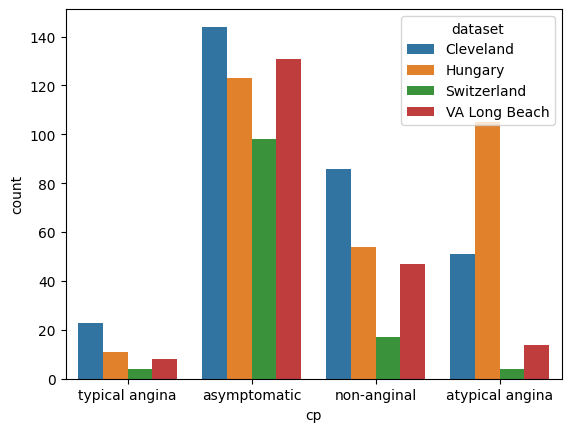

In [23]:
# find the countplot of cp with dataset
sns.countplot(df,x='cp',hue='dataset')

<Axes: xlabel='cp', ylabel='Count'>

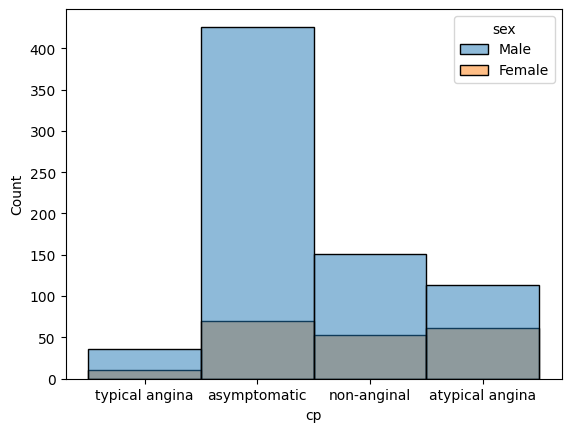

In [24]:
# Find the histplot of age column with sex
sns.histplot(data=df,x='cp',hue='sex')


In [25]:
# now lets explore the rest BP column
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

<Axes: xlabel='trestbps', ylabel='Count'>

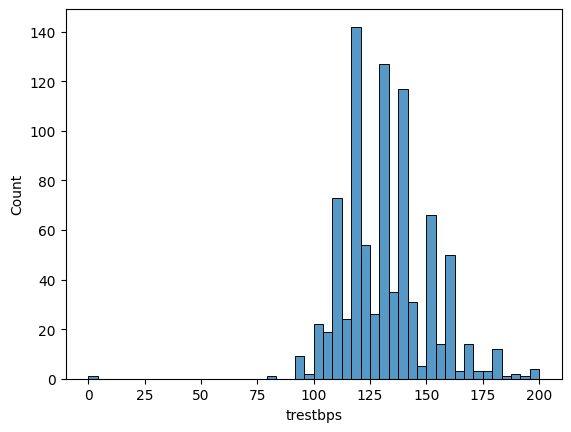

In [26]:
# create a coutplot of trestbps with sex
sns.histplot(data=df,x='trestbps')

In [27]:
# lets find the value counts of trestbps
df['trestbps'].value_counts

<bound method IndexOpsMixin.value_counts of 0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
915    127.0
916      NaN
917    122.0
918      NaN
919    120.0
Name: trestbps, Length: 920, dtype: float64>

In [28]:
# lets find out the percentage of null values
df['trestbps'].isnull().sum()
# df['trestbps'].isnull().sum()/len(df)*100

59

In [29]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [30]:
# lets find put the number of people with bp is 200
df.loc[df['trestbps']==200].nunique()

id          4
age         4
sex         2
dataset     3
cp          2
trestbps    1
chol        3
fbs         2
restecg     3
thalch      4
exang       2
oldpeak     4
slope       2
ca          1
thal        2
num         2
dtype: int64

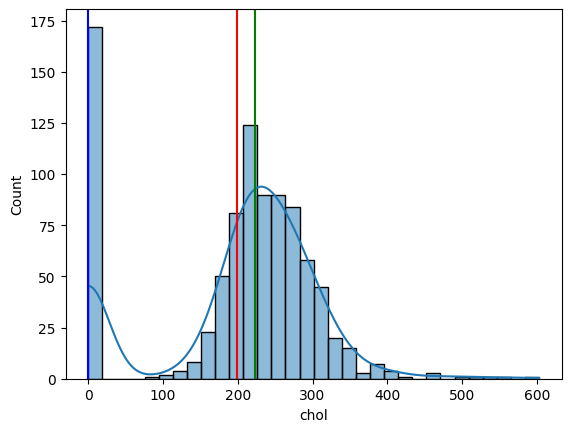

In [31]:
# lets explore the "chol" column
sns.histplot(df['chol'], kde=True)
plt.axvline(df['chol'].mean(), color='red')
plt.axvline(df['chol'].median(), color='green')
plt.axvline(df['chol'].mode()[0], color='blue')

In [32]:
# print mean,median and mode of serum cholesterol through f string

print(f'the mean of serum cholesterol is {df["chol"].mean().round(2)}')
print(f'the median of serum cholesterol is {df["chol"].median()}')
print(f'the mode of serum cholesterol is {df["chol"].mode()[0]}')

the mean of serum cholesterol is 199.13
the median of serum cholesterol is 223.0
the mode of serum cholesterol is 0.0


<Axes: xlabel='chol'>

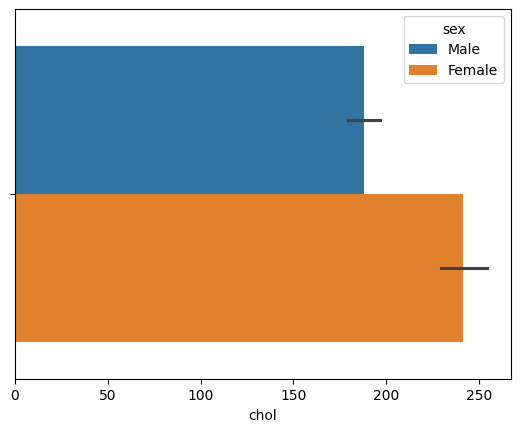

In [33]:
# find out the relationship of sex with chol by plotting
sns.barplot(data=df,x='chol',hue='sex')

This shows that males have less cholesterol values as compared to females.

# navigating the 'Fbs' fasting blood sugar >120mg/dl

In [34]:
# lets explore another column of fbs
df['fbs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: fbs
Non-Null Count  Dtype 
--------------  ----- 
830 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [35]:
# find out the missing values in fbs
print(f'the number of missing values in fbs is {df["fbs"].isnull().sum()}')


the number of missing values in fbs is 90


In [36]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

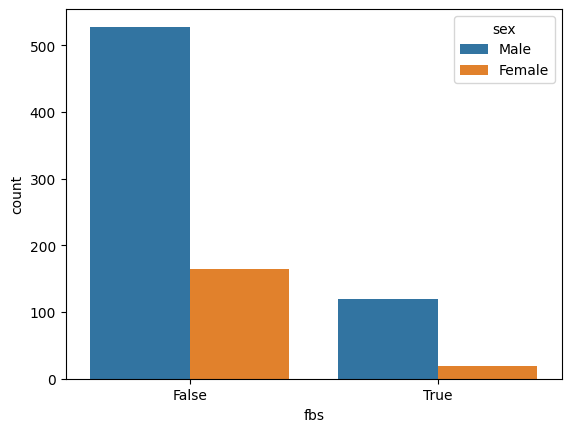

In [37]:
# find out the fbs values by plotting
sns.countplot(data=df,x='fbs',hue='sex')
import plotly.express as px

In [38]:
df.groupby('fbs')['sex'].value_counts()
    


fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
Name: count, dtype: int64

# As our dataset have more male as compared to female ,so the number of females having 'fbs > 120mg/dl'is less(19)as compared to male (119).

In [39]:
# lets explore another column of restecg
df['restecg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: restecg
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [40]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

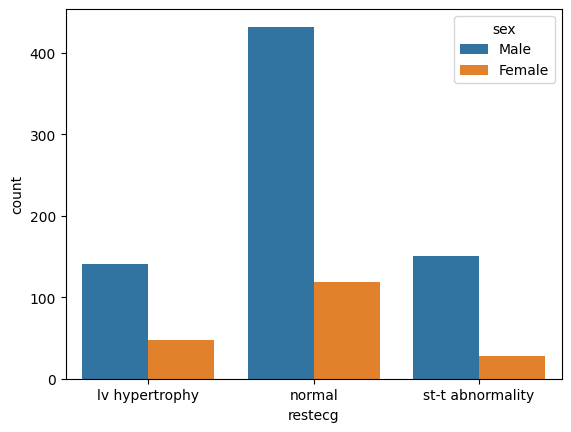

In [41]:
# now lets plot the restecg values by countplot
sns.countplot(data=df,x='restecg',hue='sex')


# Inferences
1. Normal ECG changes:A normal ECG displays regular P waves preceding QRS complexes, followed by T waves, indicating atrial and ventricular depolarization and repolarization, respectively. 
2. Left Ventricular Hypertrophy:Left ventricular hypertrophy (LVH) can manifest various changes on an electrocardiogram (ECG). 
LVH typically leads to increased voltage amplitudes in the QRS complexes due to the increased mass of the left ventricle.
3. St-t abnormality:ST segment abnormality includes ST depression,ST segment elevation or T wave inversion.

# This data shows that maximum number of people shows maximum number(551) have normal ecg changes,(188)having left ventricular hypertrophy and (1790)have st abnormality.

In [42]:
# lets explore another column of `thalch`
df['thalch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thalch
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


<Axes: xlabel='thalch', ylabel='Count'>

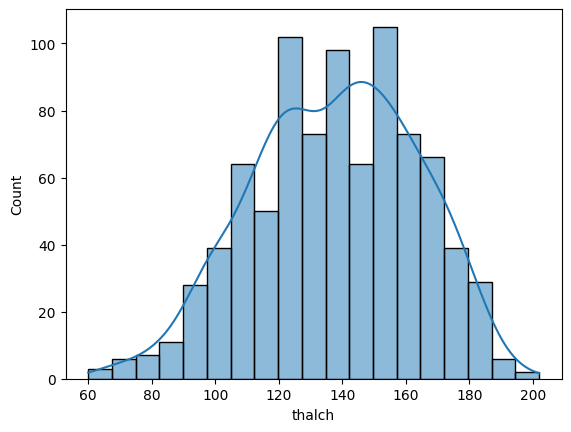

In [43]:
# make a histplot of thalch
sns.histplot(data=df,x='thalch',kde=True)

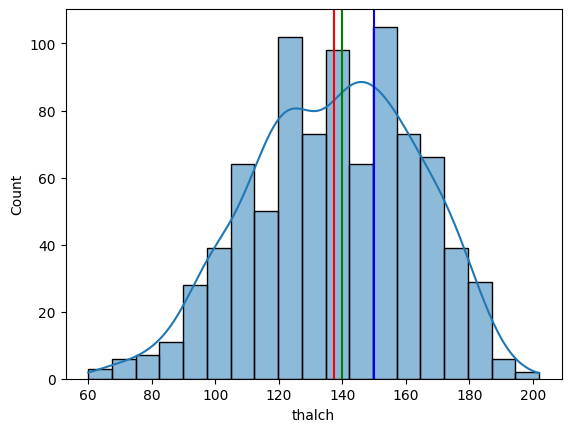

In [44]:
 # `chol` (serum cholesterol in mg/dl)
sns.histplot(df['thalch'], kde=True)
plt.axvline(df['thalch'].mean(), color='red')
plt.axvline(df['thalch'].median(), color='green')
plt.axvline(df['thalch'].mode()[0], color='blue')

`thalach` typically refers to the maximum heart rate achieved during an exercise stress test. This variable represents an important physiological parameter that can provide insights into the cardiovascular health and fitness of individuals. 
A higher value of "thalach" (maximum heart rate achieved during exercise) is generally associated with a healthier cardiovascular response.
A normal maximum heart rate achieved during exercise (thalach) varies depending on factors such as age, sex, fitness level, and individual physiological differences. However, as a general guideline, a maximum heart rate of around 220 minus age is often used to estimate the upper limit of normal during exercise

<Axes: xlabel='thalch', ylabel='dataset'>

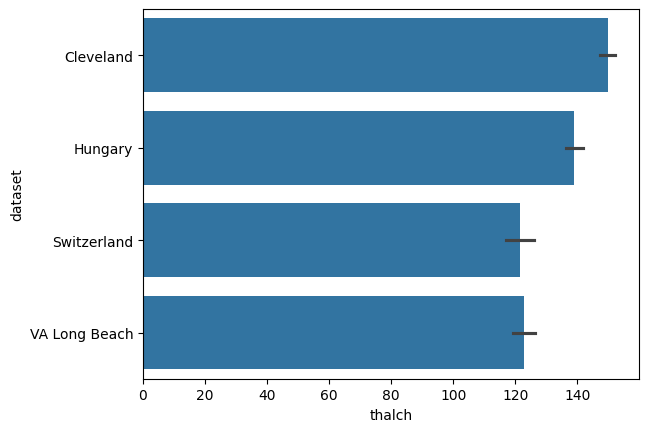

In [45]:
# lets explore the relationship of `thalch` with dataset
sns.barplot(data=df,x='thalch',y='dataset')


<Figure size 1000x1000 with 0 Axes>

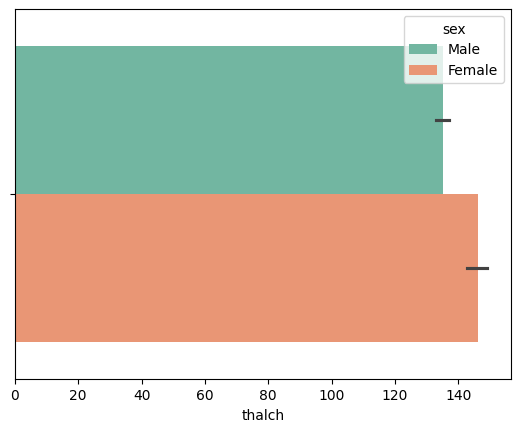

<Figure size 1000x1000 with 0 Axes>

In [46]:
# lets explore the relationship of thalch with sex
sns.barplot(data=df,x='thalch',hue='sex',palette='Set2')
plt.figure(figsize=(10,10))

In [47]:
# lets explore another column of `exang`
df['exang'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: exang
Non-Null Count  Dtype 
--------------  ----- 
865 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [48]:
# lets findout out the missing values in `exang`
print(f'the number of missing values in exang is {df["exang"].isnull().sum()}')

the number of missing values in exang is 55


In [49]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

<Axes: xlabel='exang', ylabel='age'>

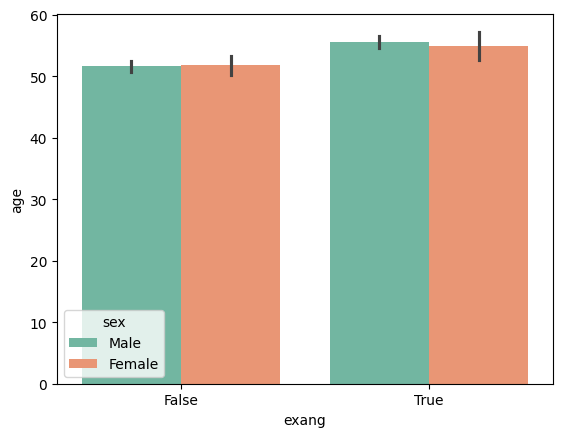

In [50]:
# lets find out the relationship of 'exang' with age and 'sex'
sns.barplot(data=df,x='exang',y='age',hue='sex',palette='Set2')

In [51]:
# lets explore another column of `oldpeak`
df['oldpeak'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: oldpeak
Non-Null Count  Dtype  
--------------  -----  
858 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In [52]:
# lets explore what is the mina nd max value of oldpeak

df['oldpeak'].max(),df['oldpeak'].min()
# find the mean,median and mode of oldpeak
print(f'the mean of oldpeak is {df["oldpeak"].mean()}')
print(f'the median of oldpeak is {df["oldpeak"].median()}')
print(f'the mode of oldpeak is {df["oldpeak"].mode()[0]}')


the mean of oldpeak is 0.8787878787878788
the median of oldpeak is 0.5
the mode of oldpeak is 0.0


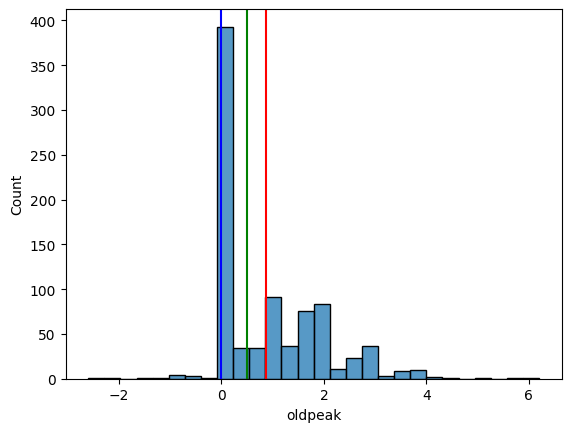

In [53]:
# lets find out the distribution of old peak value
sns.histplot(data=df,x='oldpeak')
# plot the mean ,median and mode
plt.axvline(df['oldpeak'].mean(), color='red')
plt.axvline(df['oldpeak'].median(), color='green')
plt.axvline(df['oldpeak'].mode()[0], color='blue')

In [86]:
df['oldpeak'].describe()

count     919.0
unique     53.0
top         0.0
freq      432.0
Name: oldpeak, dtype: float64

The normal value for the Old Peak (ST depression induced by exercise relative to rest) varies depending on several factors, including age, gender, and individual health conditions. In general, for adults, an Old Peak value of 0 mm (no ST depression) is considered normal. However, during an exercise stress test, slight fluctuations in the ST segment may occur even in healthy individuals. Significant ST depression (usually considered as 1 mm or more) may indicate myocardial ischemia or other cardiac abnormalities and should be further evaluated by a healthcare professional.

In [55]:
# Lets explore the `slope` column
df['slope'].value_counts()


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [56]:
df.groupby  ('slope')['sex'].value_counts()

slope        sex   
downsloping  Male       56
             Female      7
flat         Male      276
             Female     69
upsloping    Male      146
             Female     57
Name: count, dtype: int64

In [57]:
df.groupby('restecg')['slope']  .value_counts()

restecg           slope      
lv hypertrophy    flat            84
                  upsloping       64
                  downsloping     17
normal            flat           206
                  upsloping      116
                  downsloping     31
st-t abnormality  flat            55
                  upsloping       22
                  downsloping     15
Name: count, dtype: int64

The value count of down sloping is more(17) in LV hypertrophy and in ST segment abnormality(15) 

The slope may have several categorical values, which could represent different patterns of the ST segment during exercise. These values might include:

`Upsloping`: A gradual increase in the ST segment during exercise, which is generally considered normal.
`Flat`: The ST segment remains relatively unchanged during exercise.
`Downsloping`: A downward movement of the ST segment during exercise, which may indicate myocardial ischemia.

In [58]:
# lets explore the `ca` column
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [59]:
df['ca'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: ca
Non-Null Count  Dtype  
--------------  -----  
309 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In the dataset, the "ca" column may contain values ranging from 0 to 3, where:

0 indicates that no major vessels are colored by fluoroscopy.
1, 2, or 3 indicates the number of major vessels colored by fluoroscopy.
A higher number in the "ca" column generally indicates a greater severity of coronary artery disease, as it suggests more blocked or narrowed blood vessels in the heart. This information is important for diagnosing and managing heart conditions.

In [60]:
# lets explore another column of `thal`
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

The values in the "thal" column may represent different categories or results of the Thallium stress test. Common categories could include:

`Normal`: Indicates normal blood flow to the heart muscle during both rest and exercise.
`Fixed Defect`: Suggests an area of the heart with permanently reduced blood flow, typically due to scarring from a previous heart attack.
`Reversible Defect`: Indicates reduced blood flow to the heart during exercise, which improves or normalizes during rest. This may suggest ischemia or insufficient blood supply to the heart muscle under stress conditions, which could indicate coronary artery disease.

In [61]:
df.groupby('thal')['sex'].value_counts()

thal               sex   
fixed defect       Male       42
                   Female      4
normal             Male      110
                   Female     86
reversable defect  Male      171
                   Female     21
Name: count, dtype: int64

"num " is the predicted column which shows 5 classes 
* "0" is no heart disease 
* "1" is mild hear disease
* "2" is moderate heart disease
* "3" is severe heart disease
* "4" is critical heart disease

In [62]:
# lets explore our target column
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [63]:
df.groupby('num')['sex'].value_counts()

num  sex   
0    Male      267
     Female    144
1    Male      235
     Female     30
2    Male       99
     Female     10
3    Male       99
     Female      8
4    Male       26
     Female      2
Name: count, dtype: int64

In [64]:
df.groupby('num')['dataset'].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

Observations:
* This dataset shows that majority (411) individuals have no heart disease and only (28) have critical heart disease.
* As our dataset have more male so number of males having no heart disease are 267 versus females are 144.
* Similarly number of males having critical heart disease are 26 versus females are 2.
* There are 411 individuals with no heart disease, with the majority, 187, originating from Hungary.
*  For stage 3 disease (28 individuals), Cleveland leads with 13 cases.

# Exploring the correlation among numerial columns

In [65]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


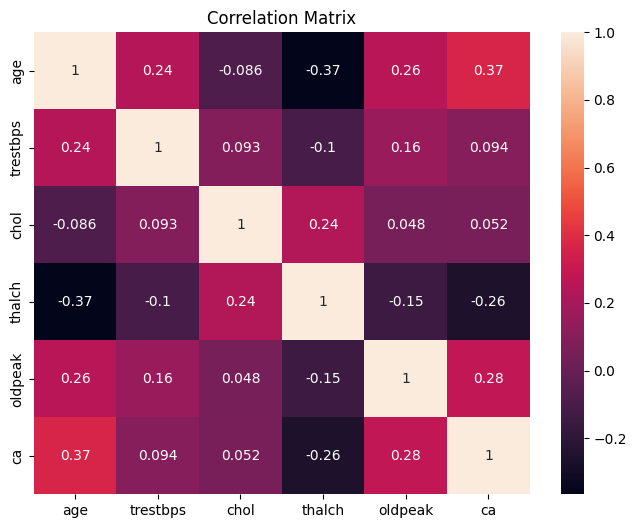

In [66]:
# Numerical Columns
numerical_columns=['age','trestbps','chol','thalch','oldpeak','ca']
# plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()


# Insights from correlation table
## Positive Correlation
* There is a positive correlation between `Age`and `trestbps`which  shows that as the patient get older her Bp raises which is a riskfactor for getting heart disease.
* There is also positive correlation between `chol` and `thalch`(maximum heart rate achieved),which shows as the cholesterol level increases the heart rate also increases.
* There is positive corelation between `ca`(Number of corony vessels colored by fluoroscopy) and `oldpeak`(ST segment depression).
## Negative Correlation
* There is a negative correlation `thalch` and `oldpeak`which is a good that as heart rate increases no effect on oldpeak. 

# Adressing the missing DATA

In [67]:
# lets find out the percentage of missing values
missing_data_cols=round(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)/len(df)*100,2)
missing_data_cols

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
dtype: float64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [69]:
numerical_columns=['trestbps','chol','thalch','oldpeak']

In [70]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [71]:
# impute missing values using sklearn simple imputer
from sklearn.impute import SimpleImputer
columns=['restecg','trestbps','exang','fbs','thalch','oldpeak','chol']
# impute the missing values in the columns
imputer=SimpleImputer(strategy='most_frequent')
df[columns]=imputer.fit_transform(df[columns])


In [72]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['slope', 'ca', 'thal']

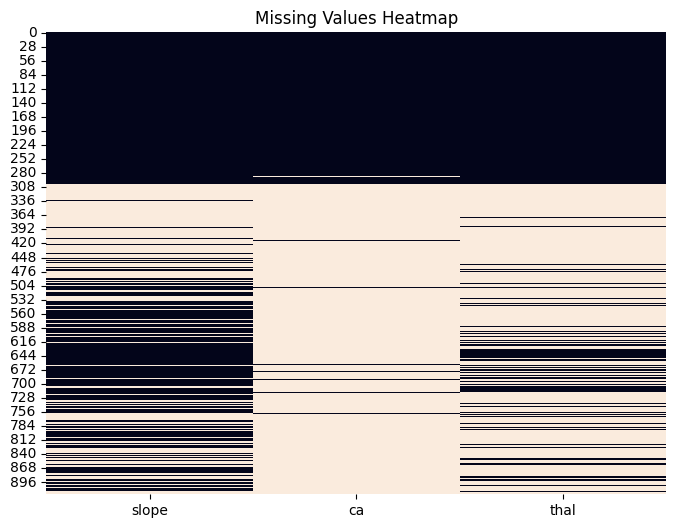

In [73]:
# create a heatmap of the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df[missing_data_cols].isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [74]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [75]:
# separate the categorical , numeric and boolean columns
categorical_cols=['sex','dataset','cp','restecg','slope','thal','ca']
numeric_cols=['trestbps','chol','thalch','oldpeak']
bool_cols=['fbs','exang']

In [87]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2)+'%', "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [88]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [78]:
missing_data_cols=round(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)/len(df)*100,2)
missing_data_cols

Series([], dtype: float64)

# lets deal with outliers

In [79]:
# lets remove the outliers in trestbps
df[df['trestbps']==0]
df=df[df['trestbps']!=0 ]


In [80]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


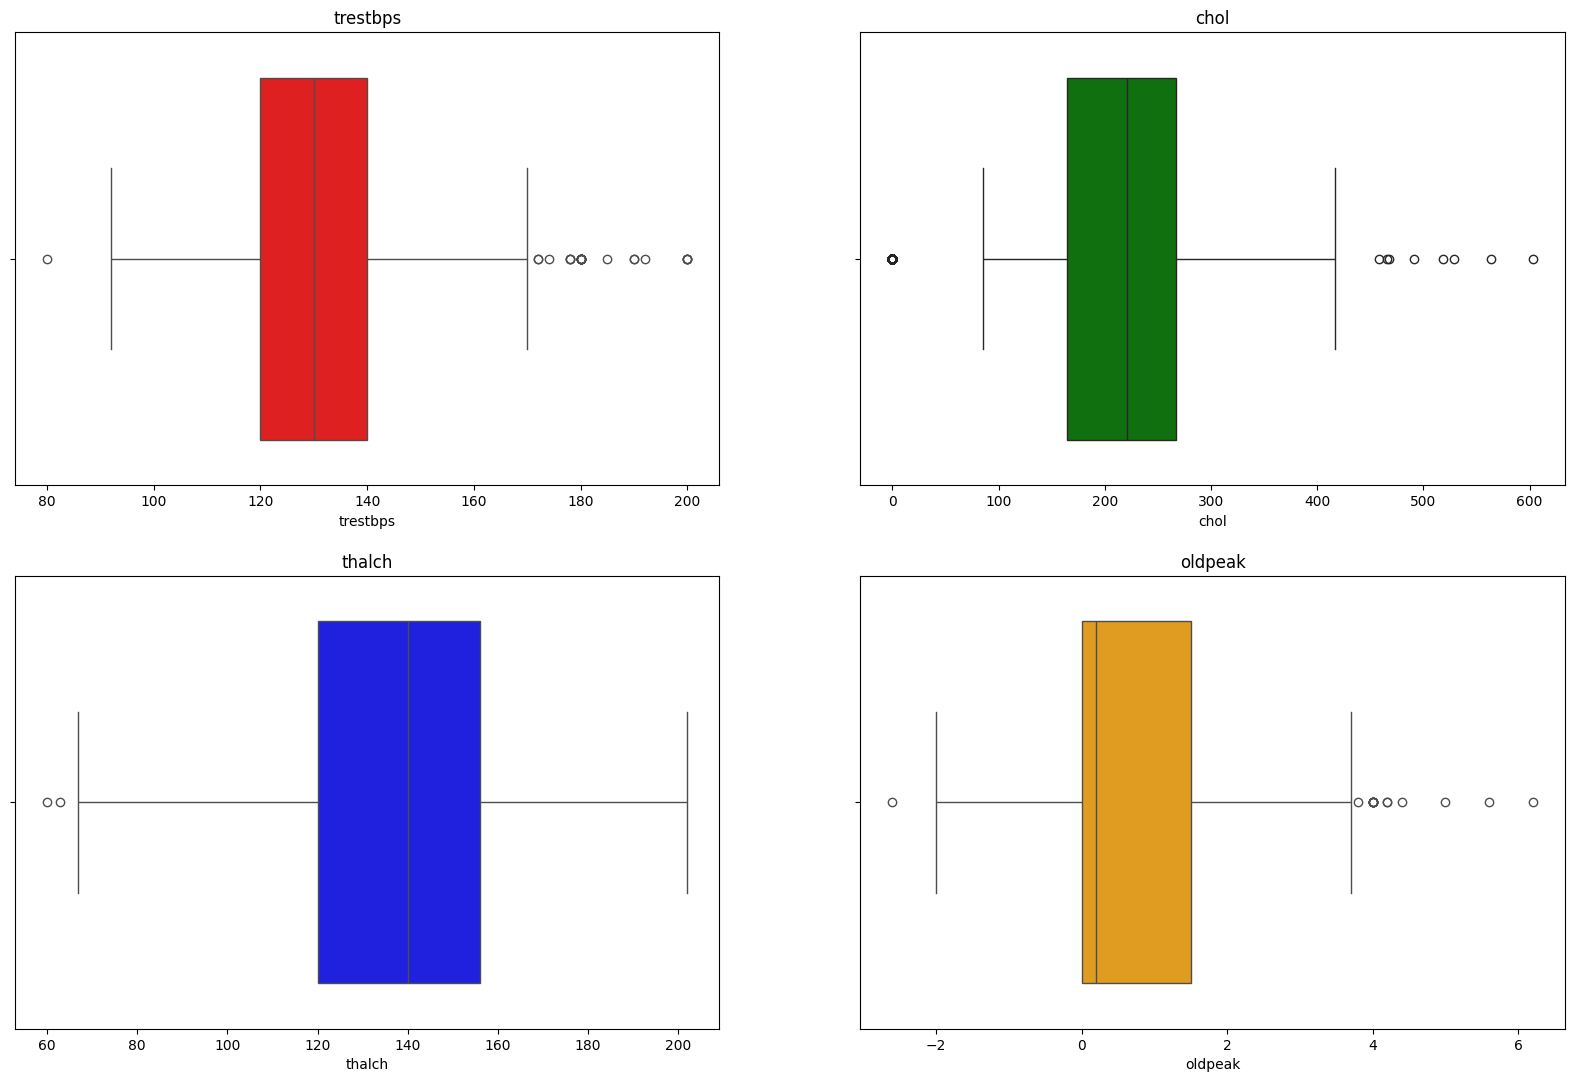

In [81]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [82]:
# lets find out the no of people having unique values of 0 in `chol`
df['chol'].value_counts()

chol
0.0      201
254.0     10
220.0     10
230.0      9
216.0      9
        ... 
412.0      1
358.0      1
360.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [83]:
# lets deal with oldpeak column
df['oldpeak'].unique()



array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0.0, 0.5,
       1.6, 1.0, 1.2, 0.2, 1.8, 3.2, 2.4, 2.0, 2.5, 2.2, 2.8, 3.0, 3.4,
       6.2, 4.0, 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4, 5.0, -1.1, -1.5, -0.1, -2.6, -0.7, -2.0, -1.0, 1.7, -0.8,
       -0.5, -0.9, 3.7], dtype=object)

In [84]:
# lets remove the outliers in `trestbps`
df=df[(df['trestbps']!=0) ]

In [85]:
df['trestbps'].shape

(919,)

# Observations
* There are no outliers in the age column.
* There is 0 value in the trestbps which is potentially an outlier as there might be no individual having 0 trestbps so i have removed it.
* There are also 0 values in `chol` column(201) which is scientifically not possible but they are probably considered missing values.
* `Oldpeak`ST depression induced by exercise relative to rest. Normal value is `0` (no ST depression)Slight depession indicates mild ischemia.It also cntains negative values,which can be considered valuable for providing unique informatoion.

In [89]:
# lets check the duplicates
df.duplicated().sum()

0

# There are no duplicates in our dataset so we are good to go.

# lets do scaling of numerical columns

In [90]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['trestbps','chol','thalch','oldpeak','age']
min_max_scalers={}
# scale the columns using for loop
for col in columns_to_scale:
    # Create a new MinMaxScaler for the column
    scaler = MinMaxScaler()

    # Fit and transform the data
    df[col] = scaler.fit_transform(df[[col]])

    # Store the scaler in the dictionary
    min_max_scalers[col] = scaler


# lets encode the categorical columns

In [91]:
columns_to_encode = ['thal', 'ca', 'dataset','slope', 'exang', 'restecg','fbs', 'cp', 'sex','num']

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

# <span style="color:Green">Machine Learning:</span>

## <ins> Split the data into X and y </ins>:🤖
* <span style="color:blue">X(input features):This is a matrix or dataframe containing the independent variables, also known as features, that the model will use to make predictions. Each row of X corresponds to one observation, and each column corresponds to a different feature. </span>
* <span style="color:blue">y(target variable)This is a vector or column containing the dependent variable that the model is trying to predict. Each element of y corresponds to the target value for the corresponding observation in X.</span>

In [95]:
X = df[['age','sex','dataset','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal']]
y = df['num']# target variable
X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

## **9.3- <ins>Empowering Intelligence: Training Models</ins>.** 🤖💡

In [96]:
# create a function to find a best model

def find_best_model(X, y, X_test, y_test):
    # Creating the global variables that we will use inside and the outside of the function as well:
    global y_pred,best_model_name
    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),
        'SVC': (SVC(random_state=42), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}),
        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),
        'XGBClassifier': (XGBClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]})
    }

    best_model_name = None
    best_accuracy = 0.0 

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(X, y)

            # You need to evaluate the model on the test set to get accuracy
            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Print the performance metrics
            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)
            print("\n_________________________________________________________________________________\n")

            # Check if the current model has the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Retrieve the best model
    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)

In [97]:
%%time
# using the function: 
find_best_model(X, y, X_test, y_test)

Model: LogisticRegression
Cross-validation Accuracy: 0.5351627464956047
Test Accuracy: 0.6014492753623188

_________________________________________________________________________________

Model: SVC
Cross-validation Accuracy: 0.5733012592064624
Test Accuracy: 0.6231884057971014

_________________________________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.5047339035400333
Test Accuracy: 0.6594202898550725

_________________________________________________________________________________

Model: RandomForestClassifier
Cross-validation Accuracy: 0.5537894986932763
Test Accuracy: 0.6956521739130435

_________________________________________________________________________________

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.5712045616535995
Test Accuracy: 0.6123188405797102

_________________________________________________________________________________

Model: GradientBoostingClassifier
Cross-validation Accu

## <span style="color:green">Inverse transform the scaled column</span>

In [98]:
for col, scaler in min_max_scalers.items():
    # Use inverse_transform to get the original values
    df[col] = scaler.inverse_transform(df[[col]])

In [99]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,2,67.0,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,3,67.0,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,4,37.0,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,5,41.0,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0


## <span style="color:green">Inverse transform the encoded column</span>

In [102]:
for col in columns_to_encode:
    # retrive the corresponding label encoder 
    le = label_encoders[col]

    # Inverse transform the data
    df[col] = le.inverse_transform(df[col])



In [104]:
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


## **<ins>Saving the Model</ins>**

In [105]:
import pickle
pickle.dump(best_model_name, open('model_best', 'wb'))

## **<ins>Load the Model</ins>**

In [106]:
model_b = pickle.load(open('model_best','rb'))

In [107]:
print (model_b)

XGBClassifier


In [108]:
print(type(model_b))

<class 'str'>


# conclusion
## Oue best model is XG Boost Classifier with accuracy is 82%.